In [1]:
import math

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
!pip install haversine

  Using cached https://files.pythonhosted.org/packages/4f/8e/04cc8b6352acfdbbe406e3cb62efeee212355dcf73de60b662b513d76f77/haversine-2.7.0-py2.py3-none-any.whl


  Cache entry deserialization failed, entry ignored
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
Cache entry deserialization failed, entry ignored
You are using pip version 10.0.1, however version 23.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
venice = [45.436482, 12.331460] 

In [6]:
coords = []
colours = []
with open('flickrCoordinates2.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for r in reader:
        colour = [int(r[2][i:i+2], 16) for i in (0, 2, 4)]
        colours.append(colour)
        
        coords.append([eval(r[0]), eval(r[1])])

In [7]:
coords

[[45.429294, 12.343171],
 [45.434444, 12.339287],
 [45.439537, 12.313613],
 [45.439778, 12.334556],
 [45.439778, 12.334556],
 [45.439537, 12.313613],
 [45.439778, 12.334556],
 [45.434215, 12.33873],
 [45.433823, 12.339566],
 [45.433296, 12.339717],
 [45.4342, 12.340682],
 [45.436684, 12.333],
 [45.431941, 12.328602],
 [45.430751, 12.334824],
 [45.43508, 12.328376],
 [45.433951, 12.337726],
 [45.433451, 12.335355],
 [45.43706, 12.334068],
 [45.43706, 12.334068],
 [45.43706, 12.334068],
 [45.43706, 12.334068],
 [45.433451, 12.335355],
 [45.439778, 12.334556],
 [45.430864, 12.330265],
 [45.43484, 12.342367],
 [45.430864, 12.330265],
 [45.43959, 12.342056],
 [45.434486, 12.339255],
 [45.419901, 12.329235],
 [45.434486, 12.339255],
 [45.433198, 12.339341],
 [45.433198, 12.339341],
 [45.433974, 12.337024],
 [45.434486, 12.339255],
 [45.431828, 12.328634],
 [45.438758, 12.339658],
 [45.438758, 12.339658],
 [45.437422, 12.340312],
 [45.437422, 12.340312],
 [45.437422, 12.340312],
 [45.433883, 

In [8]:
from haversine import haversine, Unit

refmain = venice
refsecond = coords[2]

haversine(refmain, refsecond, unit='m')

1433.320829031802

In [9]:
def convertDistToMetre(mainCoord, listofCoords):
    distances = []
    for i in listofCoords:
        distance = haversine(mainCoord, i, unit='m')
        distances.append(distance)
    return distances

In [10]:
distances = convertDistToMetre(venice, coords)

In [11]:
distances

[1214.0392209480995,
 651.4059836136513,
 1433.320829031802,
 438.9450336147344,
 438.9450336147344,
 1433.320829031802,
 438.9450336147344,
 620.7451196907584,
 698.1854167174658,
 735.2522098872755,
 762.9960203309483,
 122.24044699390494,
 551.9899351404114,
 689.2029360382379,
 286.71938690341767,
 564.1341012777336,
 453.8245119764892,
 213.3980559620787,
 213.3980559620787,
 213.3980559620787,
 213.3980559620787,
 453.8245119764892,
 438.9450336147344,
 631.614759191522,
 870.4022795010843,
 631.614759191522,
 896.0622417173641,
 647.4496861632446,
 1851.8834640765554,
 647.4496861632446,
 715.1873271224719,
 715.1873271224719,
 515.997392147884,
 647.4496861632446,
 562.5233804465889,
 687.8876316451044,
 687.8876316451044,
 698.5405399248224,
 698.5405399248224,
 698.5405399248224,
 1101.4011306877105,
 1101.4011306877105,
 1101.4011306877105,
 1101.4011306877105,
 1232.6075267819028,
 596.365052836315,
 596.365052836315,
 384.1233870822501,
 596.365052836315,
 596.365052836315

In [12]:
def get_bearing(lat1, long1, lat2, long2):
    lat1 = np.deg2rad(lat1)
    lat2 = np.deg2rad(lat2)
    long1 = np.deg2rad(long1)
    long2 = np.deg2rad(long2)
    
    dLon = long2 - long1
    y = math.sin(dLon) * math.cos(lat2)
    x = math.cos(lat1) * math.sin(lat2) - math.sin(lat1) * math.cos(lat2) * math.cos(dLon)
  
    brng = math.atan2(y, x)
    brng = np.rad2deg(brng)
    brng = (brng + 360) % 360

    return brng

In [13]:
get_bearing(venice[0], venice[1], coords[2][0],coords[2][1])

283.7160649410513

In [14]:
def getListOfBearings(mainCoord,coordinates):
    bearings = []
    for c in coordinates:
        lat = c[0]
        lon = c[1]
        bearing = get_bearing(mainCoord[0],mainCoord[1],lat,lon)
        bearings.append(bearing)
    return bearings

In [15]:
bearings = getListOfBearings(venice,coords)

In [16]:
newPoints = []
for i in range(len(bearings)):
    angle = bearings[i]
    distance = distances[i]
    px = distance * math.sin(np.deg2rad(angle))
    py = distance * math.cos(np.deg2rad(angle))
    newPoints.append([px,py])

In [17]:
newPoints#和威尼斯的相对距离

[[913.8734485473633, -799.2036974641809],
 [610.7279317580221, -226.58585317322274],
 [-1392.446354096993, 339.8554838433595],
 [241.55295194489614, 366.50363428177224],
 [241.55295194489614, 366.50363428177224],
 [-1392.446354096993, 339.8554838433595],
 [241.55295194489614, 366.50363428177224],
 [567.2684402691164, -252.05360599391943],
 [632.5048027679909, -295.6358411836533],
 [644.2932305109579, -354.2344495695978],
 [719.580597292826, -253.70591447690907],
 [120.15889657719616, 22.462556724922457],
 [-223.0149288137843, -504.932896554085],
 [262.50456234253875, -637.2535145396059],
 [-240.63673399840235, -155.8908883702119],
 [488.92994171670324, -281.415700196946],
 [303.92578948258637, -337.02492809595725],
 [203.4885156798382, 64.27405600093022],
 [203.4885156798382, 64.27405600093022],
 [203.4885156798382, 64.27405600093022],
 [203.4885156798382, 64.27405600093022],
 [303.92578948258637, -337.02492809595725],
 [241.55295194489614, 366.50363428177224],
 [-93.24979905249755, -6

In [18]:
colours = np.array(colours)

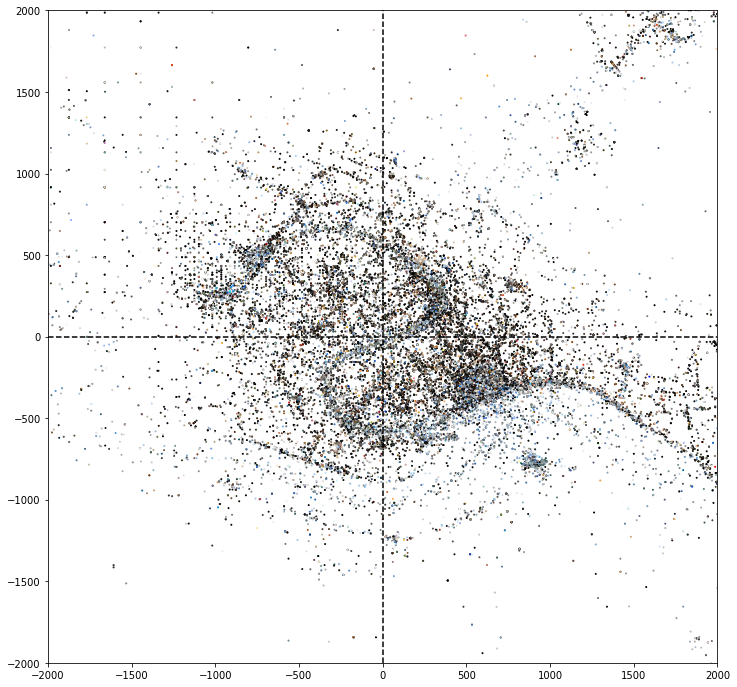

In [19]:
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter([p[0] for p in newPoints], [p[1] for p in newPoints], c = colours/255.0, s = 1)
plt.axvline(0,c= 'black', ls = '--')
plt.axhline(0,c= 'black', ls = '--')

plt.xlim([-2000,2000])
plt.ylim([-2000,2000])

plt.show()

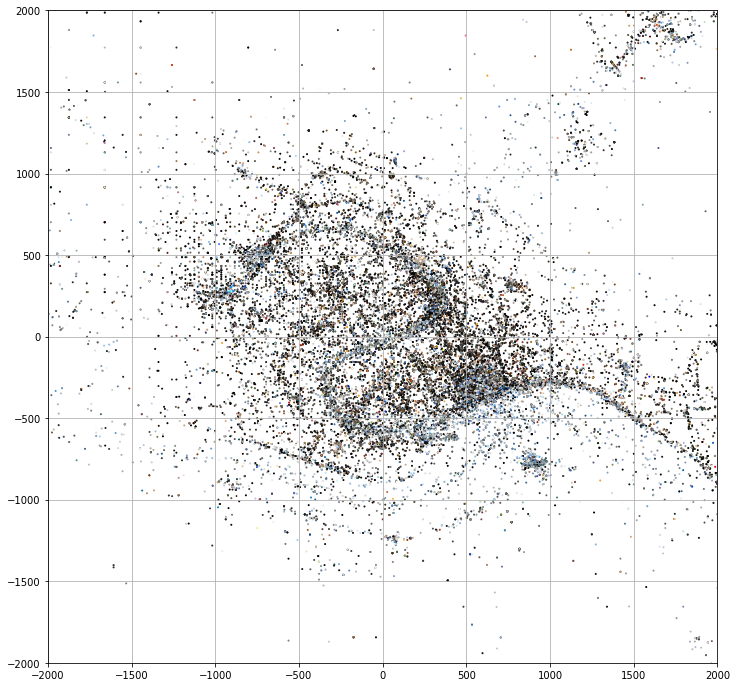

In [21]:
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter([p[0] for p in newPoints], [p[1] for p in newPoints], c = colours/255.0, s = 1)
ax.grid(True)
plt.xlim([-2000,2000])
plt.ylim([-2000,2000])

plt.show()